In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from data_conversion import conversion
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns

In [2]:
pd.set_option("future.no_silent_downcasting", True)

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA

In [4]:
geno = conversion.get_geno_data()
geno = conversion.drop_single_value_cols(geno)
geno_binary = conversion.convert_geno_to_binary(geno)
geno_ternary = conversion.convert_geno_to_ternary(geno)
pheno = conversion.get_pheno_data()
#geno_ternary_filled = conversion.fill_nan_with_distribution(geno_ternary.astype(float))
df = pd.concat([geno_ternary.astype(float), pheno], axis=1)

In [43]:
geno.transpose()

,JAXW202.2129,JAXW202.2130,JAXW202.2132,JAXW202.2133,JAXW202.2134,JAXW202.2135,JAXW202.2136,JAXW202.2137,JAXW202.2138,JAXW202.2139,...,JAXW202.3380,JAXW202.3381,JAXW202.3382,JAXW202.3383,JAXW202.3384,JAXW202.3385,JAXW202.3386,JAXW202.3387,JAXW202.3388,JAXW202.3389
SnpId,,,,,,,,,,,,,,,,,,,,,
JAX00240603,TC,TT,CC,TC,TC,TT,TC,TT,TT,CC,...,TC,TC,TC,TT,TC,TC,CC,TC,TT,TT
UNC010515443,GG,GG,AG,AG,GG,GG,AG,AA,GG,AA,...,GG,AG,AG,AG,GG,GG,AG,GG,AG,GG
UNC010001943,NaN,AA,CC,AA,NaN,AA,AA,NaN,AA,CC,...,AC,NaN,AA,NaN,AC,AC,AC,AC,NaN,AA
UNC010515539,AG,AG,AG,AG,GG,AG,AG,GG,AA,GG,...,AA,AG,AG,AG,AA,AA,AG,AA,AG,AA
UNC010515556,GG,GG,AG,AA,AG,AA,AG,AA,AG,AA,...,GG,NaN,AG,NaN,GG,AG,AG,AG,GG,AA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UNC210000599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,AG,NaN,NaN,GG,NaN,NaN,NaN
UNC210001613,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,...,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG
JAX00725096,TT,CC,CC,TT,CC,TT,CC,CC,TT,CC,...,CC,TT,CC,CC,TT,CC,TT,CC,CC,TT


In [5]:
# Convert Sex to binary: F = 1 and M = 0

df['Sex'] = df['Sex'] == 'F'
df['Sex'] = df['Sex'].astype(float)

# Create separate dataframes for female and male

df_f = df[df['Sex'] == 1]
df_m = df[df['Sex'] == 0]

# Fill NaNs

df_f1 = conversion.fill_nan_with_distribution(df_f.copy())
df_m1 = conversion.fill_nan_with_distribution(df_m.copy())

# Drop single value columns

df_female=conversion.drop_single_value_cols(df_f1)
df_male = conversion.drop_single_value_cols(df_m1)

In [6]:
# Add intersept column to the dataframe

intercept = pd.DataFrame({'intercept': np.ones(df_female.shape[0])})
intercept.set_index(df_female.index, inplace= True)
df_female = pd.concat([intercept, df_female], axis=1)

intercept = pd.DataFrame({'intercept': np.ones(df_male.shape[0])})
intercept.set_index(df_male.index, inplace= True)
df_male = pd.concat([intercept, df_male], axis=1)

In [7]:
# Get female/male SNPs

snp_female = df_female.columns[1:-3]
snp_male = df_male.columns[1:-3]

print('The number of female snps: ',len(snp_female))
print('The number of male snps: ', len(snp_male))

The number of female snps:  6615
The number of male snps:  6714


In [8]:
df_female['Sex'] = 1
df_male['Sex'] = 0

In [9]:
# Train test splits for both dataframes

df_female_train, df_female_test = train_test_split(df_female, test_size=0.2, random_state=402, shuffle = True)
df_male_train, df_male_test = train_test_split(df_male, test_size=0.2, random_state=402, shuffle = True)

df_all_train = pd.concat([df_female_train, df_male_train], join='inner')
df_all_test = pd.concat([df_female_test, df_male_test], join='inner')



In [10]:
df_all_train

,intercept,JAX00240603,UNC010515443,UNC010001943,UNC010515539,UNC010515556,UNC010516347,UNC011026542,UNC010005983,UNC010010509,...,UNC200051792,UNC210000599,UNC210001613,JAX00725096,JAX00725100,JAX00725105,Batch,WBC,NEUT,Sex
JAXW202.3120,1.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,0.0,0.0,0.0,2,4.90,486.570,1
JAXW202.3130,1.0,0.0,2.0,0.0,2.0,0.0,0.0,2.0,0.0,1.0,...,1.0,2.0,2.0,0.0,0.0,0.0,2,11.64,1086.010,1
JAXW202.2463,1.0,2.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,1.0,1.0,2.0,0.0,0.0,0.0,15,5.68,671.380,1
JAXW202.3355,1.0,0.0,1.0,0.0,2.0,0.0,1.0,2.0,0.0,1.0,...,1.0,2.0,2.0,0.0,0.0,0.0,6,5.26,783.740,1
JAXW202.2261,1.0,2.0,1.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,...,2.0,2.0,2.0,0.0,0.0,0.0,9,3.50,947.100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
JAXW202.2316,1.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,2.0,2.0,0.0,0.0,0.0,0.0,11,6.96,805.272,0
JAXW202.3207,1.0,1.0,1.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,...,1.0,2.0,1.0,0.0,0.0,0.0,8,7.54,947.024,0
JAXW202.2657,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,...,1.0,2.0,1.0,2.0,2.0,0.0,18,5.12,1295.360,0
JAXW202.3297,1.0,1.0,0.0,0.0,2.0,0.0,0.0,2.0,1.0,1.0,...,1.0,2.0,1.0,2.0,2.0,0.0,7,4.50,865.800,0


In [11]:
snps = list(df_all_train.columns[1:-4])
features = list(df_all_train.columns[:-4]) + ['Sex']
target = 'NEUT'

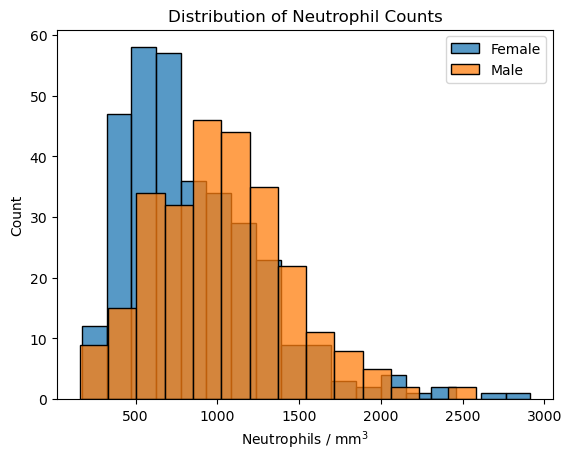

In [12]:
sns.histplot(df_female_train, x='NEUT')
sns.histplot(df_male_train, x='NEUT')
plt.legend(['Female', 'Male'])
plt.title('Distribution of Neutrophil Counts')
plt.xlabel('Neutrophils / mm${}^3$')
plt.show()

In [13]:
# Record p-values for df_female as a dictionary with {SNP : p-value}

data = []
base_model = sm.OLS(df_all_train.NEUT, df_all_train[['intercept', 'Sex']]).fit()
for snp in snps:
    model = sm.OLS(df_all_train.NEUT, df_all_train[['intercept', 'Sex', snp]]).fit()
    test_results = model.compare_f_test(base_model)
    data.append(test_results[:2])
snp_p_values = pd.DataFrame(index=snps, data=data, columns=['F', 'p'])

In [14]:
snp_p_values

,F,p
JAX00240603,2.119097,0.146004
UNC010515443,1.204585,0.272855
UNC010001943,0.894523,0.344642
UNC010515539,7.148524,0.007710
UNC010515556,0.610837,0.434786
...,...,...
UNC210000599,0.109694,0.740610
UNC210001613,0.406563,0.523967
JAX00725096,3.219180,0.073292
JAX00725100,3.461181,0.063323


In [15]:
alpha = 0.05
alpha_bonferroni = alpha / len(snps)
snp_p_values[snp_p_values['p'] < alpha_bonferroni]

,F,p
UNC141289118,22.519926,0.000003
UNC170111028,22.844575,0.000002


(0.0, 50.0)

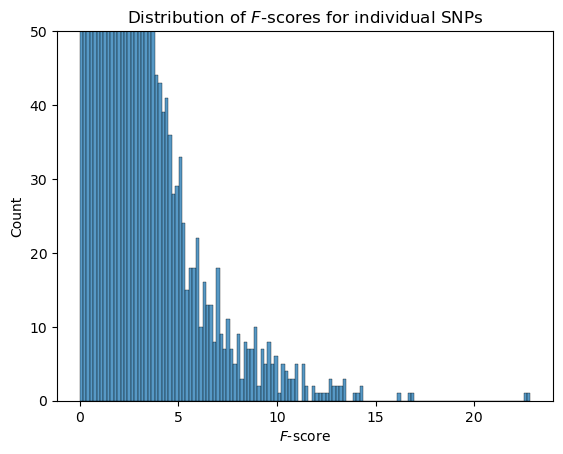

In [16]:
sns.histplot(snp_p_values, x='F')
plt.title('Distribution of $F$-scores for individual SNPs')
plt.xlabel('$F$-score')
plt.ylim(0,50)

In [17]:
significant_snps = list(snp_p_values[snp_p_values['p'] < alpha_bonferroni].index)

model_baseline = Pipeline([('select_feature', ColumnTransformer([('pass', 'passthrough', ['Sex'])])),
                           ('linreg', LinearRegression())])

model_significant_single = Pipeline([('select_feature', ColumnTransformer([('pass', 'passthrough', significant_snps + ['Sex'])])),
                                     ('linreg', LinearRegression())])

model_significant_interaction = Pipeline([('select_feature', ColumnTransformer([('interact', PolynomialFeatures(2), significant_snps + ['Sex'])])),
                                          ('linreg', LinearRegression(fit_intercept=False))])

In [18]:
high_snps = snp_p_values[snp_p_values['F'] > 7].index

In [19]:
len(high_snps)

181

In [20]:
data = []
base_model = sm.OLS(df_all_train.NEUT, df_all_train[['intercept', 'Sex']]).fit()
for i, snp1 in enumerate(high_snps):
    for snp2 in high_snps[i + 1:]:
        interaction = df_all_train[snp1] * df_all_train[snp2]
        model = sm.OLS(df_all_train.NEUT, pd.concat([df_all_train[['intercept', 'Sex', snp1, snp2]], interaction], axis=1)).fit()
        test_results = model.compare_f_test(base_model)
        data.append((snp1, snp2) + test_results[:2])
snp_joint_p_values = pd.DataFrame(data=data, columns=['snp1', 'snp2', 'F', 'p'])

In [21]:
snp_joint_p_values['log_p'] = np.log(snp_joint_p_values['p'])

In [22]:
0.05 / ((len(snps)**2 - len(snps)) / 2)

2.2932512459463345e-09

In [23]:
snp_joint_p_values.sort_values(by='p')

,snp1,snp2,F,p,log_p
5981,UNC020441894,UNC170111028,14.570329,3.641815e-09,-19.430784
15842,UNC141289118,UNC170111028,14.535868,3.817319e-09,-19.383717
5819,UNC020573419,UNC141289118,14.339329,4.993238e-09,-19.115181
5963,UNC020441894,UNC141289118,14.126201,6.682427e-09,-18.823785
12320,UNC080571988,JAX00202258,13.827022,1.006298e-08,-18.414403
...,...,...,...,...,...
12810,backupJAX00195348,JAX00289733,2.864526,3.609768e-02,-3.321527
13132,backupJAX00017846,JAX00289733,2.813877,3.862535e-02,-3.253846
12807,backupJAX00195348,backupJAX00017846,2.783704,4.021277e-02,-3.213571
11240,UNC060508303,backupUNC060517806,2.716281,4.399430e-02,-3.123695


None of the above SNPs have a $p$-value below the Bonferroni-modified significance level (for all pairs), suggesting that we don't want to add any additional SNPs in pairs that we weren't already using. However we didn't test all SNPs - I suppose it's possible that there's a significant pair where one of the individual SNPs is not in the top 165 that we used. Perhaps with more processing power we could test all pairs.

### CV for the selection and baseline (sex-only) model

In [24]:
model_mses = {}

In [25]:
## Make kfold object
kfold = KFold(n_splits=5, 
              shuffle=True, 
              random_state = 403)

In [26]:
models = [model_baseline, model_significant_single, model_significant_interaction]
mses = np.zeros(shape=(len(models), 5))
## loop through all splits
for i, (train_index, test_index) in enumerate(kfold.split(df_all_train)):
    ## get train and holdout sets
    df_train_train = df_all_train.iloc[train_index]
    df_holdout = df_all_train.iloc[test_index]

    for j, model in enumerate(models):
        model.fit(X=df_train_train[features], y=df_train_train[target])
        preds = model.predict(X=df_holdout[features])
        mses[j, i] = mean_squared_error(df_holdout[target], preds)
 
mean_mses = np.mean(mses, axis=1)
model_mses['Baseline'] = mean_mses[0]
model_mses['Linear'] = mean_mses[1]
model_mses['Interaction'] = mean_mses[2]

In [27]:
model_mses

{'Baseline': np.float64(184250.12777011498),
 'Linear': np.float64(171906.18810734426),
 'Interaction': np.float64(175384.97400696637)}

## A lasso reminder

The other algorithmic approach we will touch on is lasso regression.

Recall from our Regularization that lasso can be used for feature selection by slowly increasing the value of the hyperparameter $\alpha$ and observing the persistence of the coefficients (i.e. which coefficients stay above $0$ the longest?). 


In [28]:
alphas = [0.000001,.00001,.0001,.001,.01,.1,.25,.5,.75,1,5,10,25,50,100,1000,10000]
lasso_models = [Pipeline([('select_feature', ColumnTransformer([('pass', 'passthrough', snps + ['Sex'])])),
                          ('scale', StandardScaler()),
                          ('lasso', Lasso(alpha=a))])
                for a in alphas]

## make coefficient holder
mses = np.zeros(shape=(len(lasso_models), 5))

for i, (train_index, test_index) in enumerate(kfold.split(df_all_train)):
    ## get train and holdout sets
    df_train_train = df_all_train.iloc[train_index]
    df_holdout = df_all_train.iloc[test_index]

    for j, model in enumerate(lasso_models):
        model.fit(X=df_train_train[features], y=df_train_train[target])
        preds = model.predict(X=df_holdout[features])
        mses[j, i] = mean_squared_error(df_holdout[target], preds)

mean_mses = np.mean(mses, axis=1)



c:\Users\gaga6\anaconda3\envs\erdos_fall_2024\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.756e+04, tolerance: 9.090e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\gaga6\anaconda3\envs\erdos_fall_2024\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.284e+04, tolerance: 9.090e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\gaga6\anaconda3\envs\erdos_fall_2024\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consi

Text(0, 0.5, 'MSE')

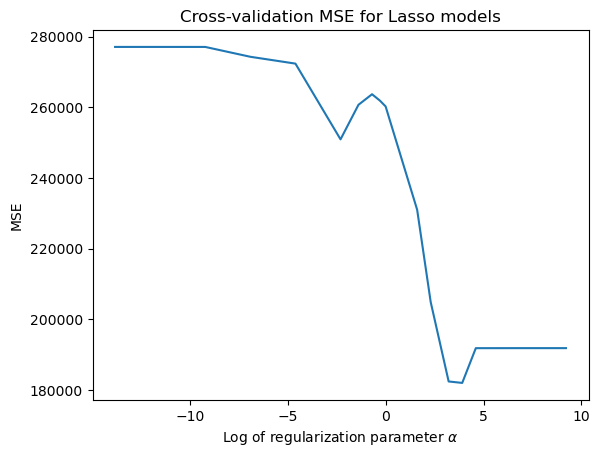

In [29]:
sns.lineplot(x=np.log(alphas), y=mean_mses)
plt.title('Cross-validation MSE for Lasso models')
plt.xlabel('Log of regularization parameter $\\alpha$')
plt.ylabel('MSE')

In [30]:
i = np.argmin(mean_mses)
best_alpha = alphas[i]
best_mse = mean_mses[i]
print(f'Best alpha is {best_alpha} with MSE of {best_mse}')
model_lasso = lasso_models[i]
model_mses['Lasso'] = best_mse

Best alpha is 50 with MSE of 182051.39040790958


In [31]:
model_mses

{'Baseline': np.float64(184250.12777011498),
 'Linear': np.float64(171906.18810734426),
 'Interaction': np.float64(175384.97400696637),
 'Lasso': np.float64(182051.39040790958)}

In [32]:
coefs = pd.Series(data=model_lasso['lasso'].coef_, index=snps + ['Sex'])
coefs['intercept'] = model_lasso['lasso'].intercept_

In [33]:
coefs[np.abs(coefs) > 0]

UNC_rs50672660          5.543792
UNC010275555           -4.601053
JAX00095051            18.253617
UNC020093982          -10.458737
UNC020573419           -3.152210
backupUNC020195558    -14.263803
JAX00101561            -4.963887
UNC020257161           18.198556
backupUNC020280159     -0.451508
UNC020655905            5.828759
JAX00124700            -1.781808
UNC050425680            0.823237
backupUNC060517806     -4.574755
backupUNC060523700     -0.659839
backupUNC060122218     23.893845
UNC060138179            2.030064
UNC080571988            5.779658
backupUNC080101928      0.830548
JAX00018360            11.850650
JAX00291370            -4.166989
backupJAX00303322       6.009807
backupUNC110256652      4.609434
JAX00202258             1.296393
UNC131275408            3.035160
UNC141289118           19.612089
backupUNC150450325      3.682748
UNC160271705            3.885074
UNC160148342            1.026762
JAX00433357             9.511154
UNC170111028          -18.531931
backupUNC1

In [35]:
len(coefs[np.abs(coefs) > 0])

40

In [36]:
coefs[significant_snps]

UNC141289118    19.612089
UNC170111028   -18.531931
dtype: float64

### PCA

We can try to do some unsupervised dimensionality reduction with PCA. This should help to prevent overfitting but we might lose out on the features that we care about.

In [37]:
components = range(1, 50)
pca_models = [Pipeline([('select_feature', ColumnTransformer([('pass', 'passthrough', snps + ['Sex'])])),
                        ('scale', StandardScaler()),
                        ('pca', PCA(n)),
                        ('linreg', LinearRegression())])
              for n in components]

## make coefficient holder
mses = np.zeros(shape=(len(pca_models), 5))

for i, (train_index, test_index) in enumerate(kfold.split(df_all_train)):
    ## get train and holdout sets
    df_train_train = df_all_train.iloc[train_index]
    df_holdout = df_all_train.iloc[test_index]

    for j, model in enumerate(pca_models):
        model.fit(X=df_train_train[features], y=df_train_train[target])
        preds = model.predict(X=df_holdout[features])
        mses[j, i] = mean_squared_error(df_holdout[target], preds)

mean_mses = np.mean(mses, axis=1)

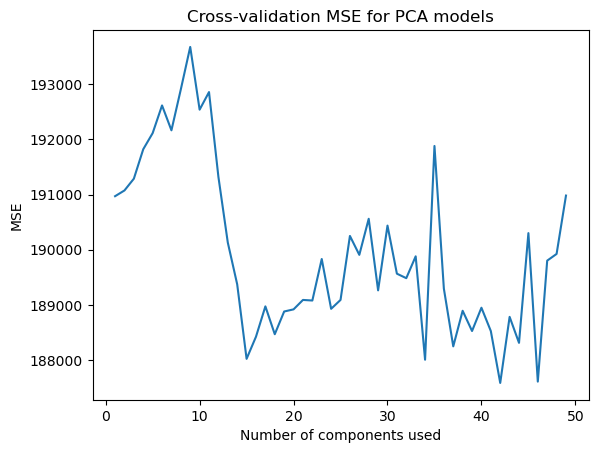

In [38]:
sns.lineplot(x=components, y=mean_mses)
plt.title('Cross-validation MSE for PCA models')
plt.xlabel('Number of components used')
plt.ylabel('MSE')
plt.show()

In [39]:
i = np.argmin(mean_mses)
best_n = components[i]
best_mse = mean_mses[i]
print(f'Best number of components is {best_n} with MSE of {best_mse}')
model_pca = pca_models[i]
model_mses['PCA'] = best_mse

Best number of components is 42 with MSE of 187587.50768903023


In [40]:
model_mses

{'Baseline': np.float64(184250.12777011498),
 'Linear': np.float64(171906.18810734426),
 'Interaction': np.float64(175384.97400696637),
 'Lasso': np.float64(182051.39040790958),
 'PCA': np.float64(187587.50768903023)}